# Investigating the Scientific Method

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


### You have 

In [18]:
# data collected after 5 months of watering
x = np.arange(0, 20, 2)
y = list(map(lambda x: 2*x + np.random.normal(0, np.sqrt(x)), x))

# growth is in cm
# water added is in cups/week
df = pd.DataFrame({ 'growth': y, 'water': x})

# visualize the data
print(df)

      growth  water
0   0.000000      0
1   4.375773      2
2   6.070826      4
3   8.298008      6
4  15.822696      8
5  17.837660     10
6  24.003270     12
7  26.726078     14
8  29.880242     16
9  32.559686     18


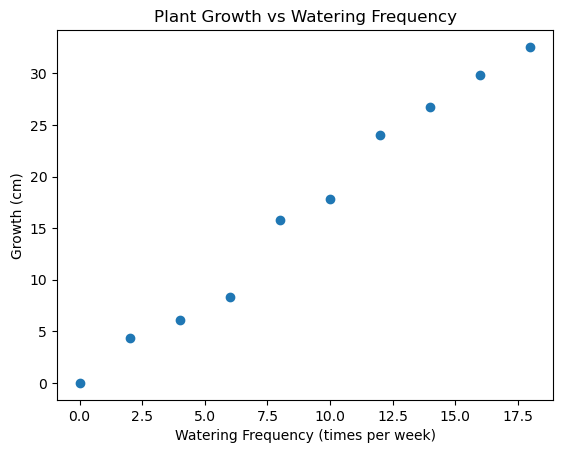

In [20]:
# plot the data
plt.scatter(df['water'], df['growth'])
# add labels to the plot
plt.xlabel('Watering Frequency (cups per week)')
plt.ylabel('Growth (cm)')
plt.title('Plant Growth vs Watering Frequency')
plt.show()

In [22]:
from scipy.stats import linregress

# Perform linear regression on the data
slope, intercept, r_value, _, _  = linregress(df['water'], df['growth'])

# Print the results
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)


Slope: 1.8908347426438645
Intercept: -0.4600889198460969
R-squared: 0.987046173008991


### What does the "fitting function" look like? 

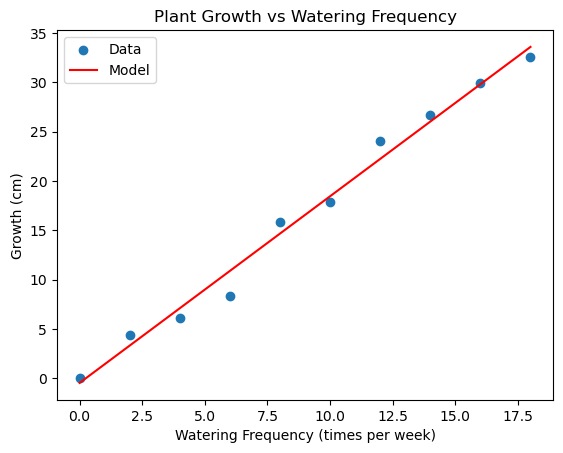

In [24]:
# Plot the data and the regression line
plt.scatter(df['water'], df['growth'])
plt.plot(df['water'], slope*df['water'] + intercept, color='red')

# add labels to the plot
plt.legend(['Data', 'Model'])
plt.xlabel('Watering Frequency (cups per week)')
plt.ylabel('Growth (cm)')
plt.title('Plant Growth vs Watering Amount')
plt.show()

### Q: How different is your model from the data?

In [25]:
# try to see if the model is good by comparing the predicted values to the actual values
# HINT: what operation lets you compare two things?

### Q: One of your friends has been watering their plant 3 times a week, how much growth would you expect after 5 months? what about 5, 7 times?

### They measure the following after 5 months

### Another friend measures a different set of growth

In [41]:
# they measured the following growth after 5 months
data2 = { 'growth': [0, 2, 2.5,3, 3], 'watering frequency': [1, 3, 5, 7, 9]}
# add random noise to growth
df2 = pd.DataFrame(data2)
df2['growth'] = df2['growth'] + np.random.normal(0, 0.1, 5)


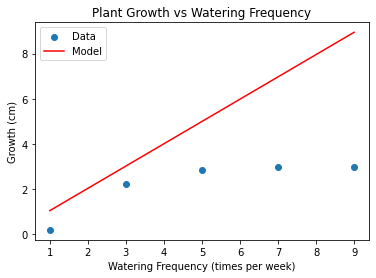

In [42]:
# plot new data and model
plt.scatter(df2['watering frequency'], df2['growth'])
plt.plot(df2['watering frequency'], slope*df2['watering frequency'] + intercept, color='red')
# add labels to the plot
plt.legend(['Data', 'Model'])
plt.xlabel('Watering Frequency (times per week)')
plt.ylabel('Growth (cm)')
plt.title('Plant Growth vs Watering Frequency')
plt.show()

a: 1.3205730466848158
b: 1.3813120825122174


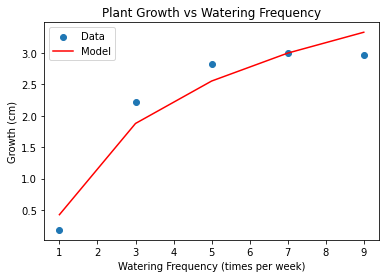

In [43]:
# is the model good?
# what would be a better fit?
# do a log fit to the second data
from scipy.optimize import curve_fit

def log_model(x, a, b):
    # equation for a log model
    return a * np.log(b * x)

# Fit the log model to the data
params, covariance = curve_fit(log_model, df2['watering frequency'], df2['growth'])

# Print the parameters
print("a:", params[0])
print("b:", params[1])

# Plot the data and the log model
plt.scatter(df2['watering frequency'], df2['growth'])
plt.plot(df2['watering frequency'], log_model(df2['watering frequency'], params[0], params[1]), color='red')
# add labels to the plot
plt.legend(['Data', 'Model'])
plt.xlabel('Watering Frequency (times per week)')
plt.ylabel('Growth (cm)')
plt.title('Plant Growth vs Watering Frequency')
plt.show()

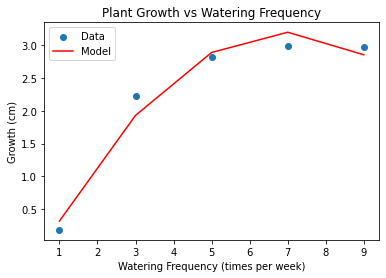

In [44]:
# try polynomial fit
def poly_model(x, a, b, c):
    # equation for a polynomial model
    return a * x**2 + b * x + c

# Fit the polynomial model to the data
params2, covariance2 = curve_fit(poly_model, df2['watering frequency'], df2['growth'])

# plot the data and the polynomial model
plt.scatter(df2['watering frequency'], df2['growth'])
plt.plot(df2['watering frequency'], poly_model(df2['watering frequency'], params2[0], params2[1], params2[2]), color='red')
# add labels to the plot
plt.legend(['Data', 'Model'])
plt.xlabel('Watering Frequency (times per week)')
plt.ylabel('Growth (cm)')
plt.title('Plant Growth vs Watering Frequency')
plt.show()


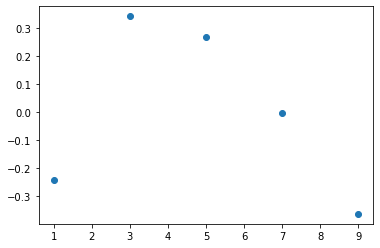

In [45]:
# try other things...
# check the goodness of the fit
# check the residuals
# check the p-value
# check the r-squared value
# check the standard error
# check the covariance matrix

# check the residuals
# calculate the residuals
residuals = df2['growth'] - log_model(df2['watering frequency'], params[0], params[1])
# plot the residuals
plt.scatter(df2['watering frequency'], residuals)